# Results CMIP6

This notebook contains the results from the CMIP6 forcing, for the three future climate scenarios: SSP1-2.6, SSP2-4.5 and SSP5-8.5. The results cover the time period 2025-2100.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt
from cartopy import crs
from cartopy import feature as cfeature
import fiona
import shapely.geometry
from pyproj import Geod
from rich import print
import pandas as pd
import xarray as xr

import ewatercycle.forcing
import ewatercycle.models
import ewatercycle.parameter_sets

### 2025-2035
The groundwater recharge from PCR-GlobWB and the approximated groundwater recharge, also with PCR-GlobWB, for the future climate scenarios from CMIP6: SSP1-2.6, SSP2-4.5 and SSP5-8.5 plotted for the ten year time period 2025-2035.

First step is loading all the CSV files in which the data is stored.

In [2]:
approx126_2535 = pd.read_csv('approx126_2025_2035.csv')#, index_col='time')
discharge126_2535 = pd.read_csv('discharge126_2025_2035.csv')#, index_col='time')
recharge126_2535 = pd.read_csv('recharge126_2025_2035.csv')#, index_col='time')

In [3]:
approx245_2535 = pd.read_csv('approx245_2025_2035.csv', index_col='time')
discharge245_2535 = pd.read_csv('discharge245_2025_2035.csv', index_col='time')
recharge245_2535 = pd.read_csv('recharge245_2025_2035.csv', index_col='time')

In [4]:
approx585_2535 = pd.read_csv('approx585_2025_2035.csv', index_col='time')
discharge585_2535 = pd.read_csv('discharge585_2025_2035.csv', index_col='time')
recharge585_2535 = pd.read_csv('recharge585_2025_2035.csv')#, index_col='time')

Now, the discharge can be converted from m3/s to mm/day. Since the other values used in the water balance are already in m/day, these only need to be converted to mm/day. Filling in the discharge in the waterbalance using only the baseflow, the approximated groundwater recharge can be plotted. This now can be compared to the groundwater recharge.

In [5]:
discharge126_2535['Discharge'] = discharge126_2535.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge245_2535['Discharge'] = discharge245_2535.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge585_2535['Discharge'] = discharge585_2535.mean(axis=1) * 86400 * 1000 / (388*10**6)

In [6]:
approx126_2535['Approximation Groundwater Recharge'] = approx126_2535.mean(axis=1)*1000 - discharge126_2535['Discharge'].min()
approx245_2535['Approximation Groundwater Recharge'] = approx245_2535.mean(axis=1)*1000 - discharge245_2535['Discharge'].min()
approx585_2535['Approximation Groundwater Recharge'] = approx585_2535.mean(axis=1)*1000 - discharge585_2535['Discharge'].min()

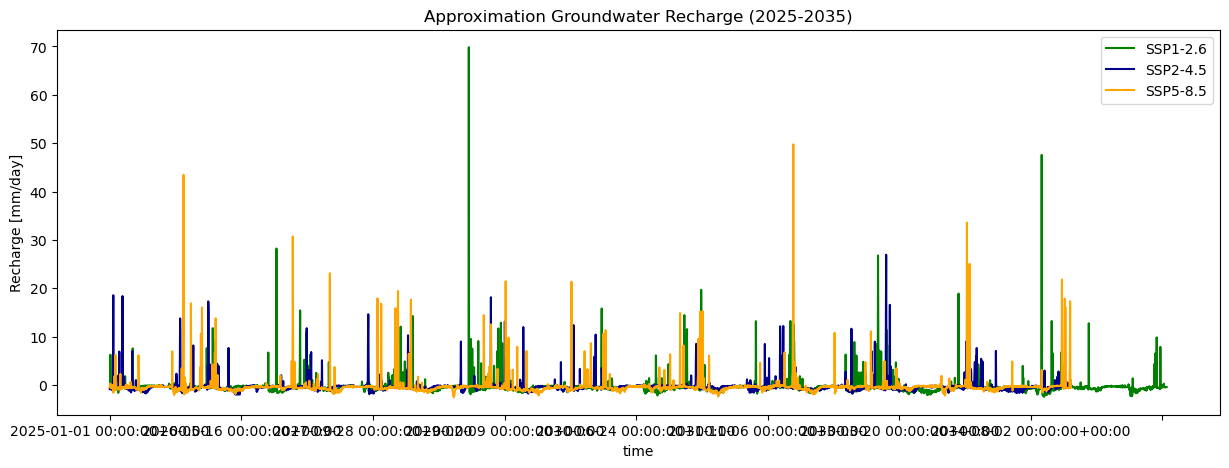

In [7]:
plt.figure(figsize=(15,5))
approx126_2535['Approximation Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
approx245_2535['Approximation Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
approx585_2535['Approximation Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
plt.title('Approximation Groundwater Recharge (2025-2035)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

### 2035-2045
The groundwater recharge from PCR-GlobWB and the approximated groundwater recharge, also with PCR-GlobWB, for the future climate scenarios from CMIP6: SSP1-2.6, SSP2-4.5 and SSP5-8.5 plotted for the ten year time period 2035-2045.

First step is loading all the CSV files in which the data is stored.

In [8]:
approx126_3545 = pd.read_csv('approx126_2035_2045.csv')
discharge126_3545 = pd.read_csv('discharge126_2035_2045.csv')
recharge126_3545 = pd.read_csv('recharge126_2035_2045.csv')

In [9]:
approx245_3545 = pd.read_csv('approx245_2035_2045.csv', index_col='time')
discharge245_3545 = pd.read_csv('discharge245_2035_2045.csv', index_col='time')
recharge245_3545 = pd.read_csv('recharge245_2035_2045.csv', index_col='time')

In [10]:
approx585_3545 = pd.read_csv('approx585_2035_2045.csv', index_col='time')
discharge585_3545 = pd.read_csv('discharge585_2035_2045.csv', index_col='time')
recharge585_3545 = pd.read_csv('recharge585_2035_2045.csv', index_col='time')

Now, the discharge can be converted from m3/s to mm/day. Since the other values used in the water balance are already in m/day, these only need to be converted to mm/day. Filling in the discharge in the waterbalance using only the baseflow, the approximated groundwater recharge can be plotted. This now can be compared to the groundwater recharge.

In [11]:
recharge126_3545['Groundwater Recharge'] = recharge126_3545.mean(axis=1)*1000
recharge245_3545['Groundwater Recharge'] = recharge245_3545.mean(axis=1)*1000
recharge585_3545['Groundwater Recharge'] = recharge585_3545.mean(axis=1)*1000

In [12]:
discharge126_3545['Discharge'] = discharge126_3545.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge245_3545['Discharge'] = discharge245_3545.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge585_3545['Discharge'] = discharge585_3545.mean(axis=1) * 86400 * 1000 / (388*10**6)

In [13]:
approx126_3545['Approximation Groundwater Recharge'] = approx126_3545.mean(axis=1)*1000 - discharge126_3545['Discharge'].min()
approx245_3545['Approximation Groundwater Recharge'] = approx245_3545.mean(axis=1)*1000 - discharge245_3545['Discharge'].min()
approx585_3545['Approximation Groundwater Recharge'] = approx585_3545.mean(axis=1)*1000 - discharge245_3545['Discharge'].min()

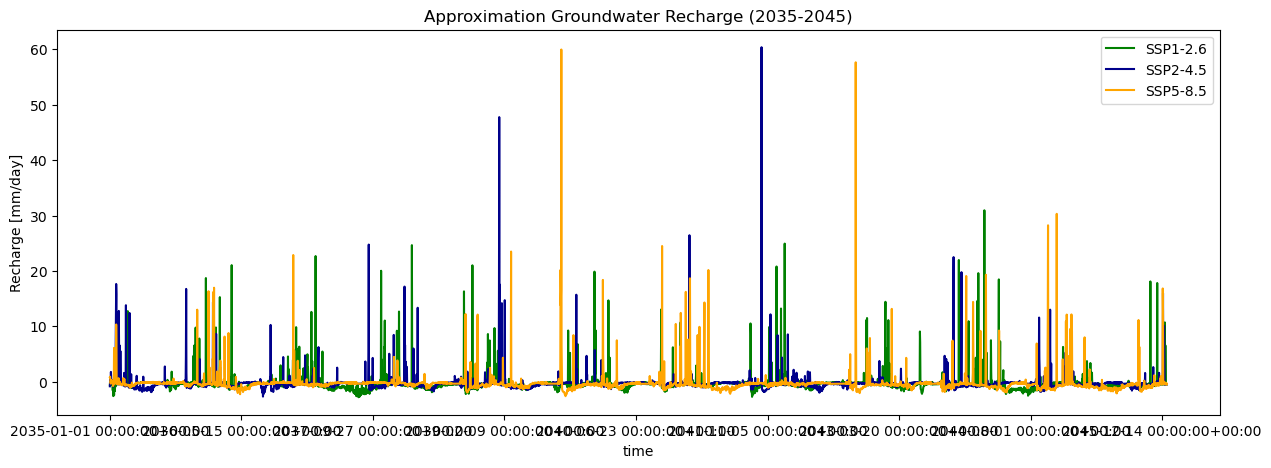

In [14]:
plt.figure(figsize=(15,5))
approx126_3545['Approximation Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
approx245_3545['Approximation Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
approx585_3545['Approximation Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
plt.title('Approximation Groundwater Recharge (2035-2045)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

In [18]:
#plt.figure(figsize=(15,5))
#recharge126_3545['Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
#recharge245_3545['Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
#recharge585_3545['Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
#plt.title('Groundwater Recharge (2035-2045)')
#plt.ylabel('Recharge [mm/day]')
#plt.legend();

### 2045-2055
The groundwater recharge from PCR-GlobWB and the approximated groundwater recharge, also with PCR-GlobWB, for the future climate scenarios from CMIP6: SSP1-2.6, SSP2-4.5 and SSP5-8.5 plotted for the ten year time period 2045-2035.

First step is loading all the CSV files in which the data is stored.

In [19]:
approx126_4555 = pd.read_csv('approx126_2045_2055.csv', index_col='time')
discharge126_4555 = pd.read_csv('discharge126_2045_2055.csv', index_col='time')
recharge126_4555 = pd.read_csv('recharge126_2045_2055.csv', index_col='time')

In [20]:
approx245_4555 = pd.read_csv('approx245_2045_2055.csv', index_col='time')
discharge245_4555 = pd.read_csv('discharge245_2045_2055.csv', index_col='time')
recharge245_4555 = pd.read_csv('recharge245_2045_2055.csv', index_col='time')

In [21]:
approx585_4555 = pd.read_csv('approx585_2045_2055.csv', index_col='time')
discharge585_4555 = pd.read_csv('discharge585_2045_2055.csv', index_col='time')
recharge585_4555 = pd.read_csv('recharge585_2045_2055.csv', index_col='time')

Now, the discharge can be converted from m3/s to mm/day. Since the other values used in the water balance are already in m/day, these only need to be converted to mm/day. Filling in the discharge in the waterbalance using only the baseflow, the approximated groundwater recharge can be plotted. This now can be compared to the groundwater recharge.

In [22]:
recharge126_4555['Groundwater Recharge'] = recharge126_4555.mean(axis=1)*1000
recharge245_4555['Groundwater Recharge'] = recharge245_4555.mean(axis=1)*1000
recharge585_4555['Groundwater Recharge'] = recharge585_4555.mean(axis=1)*1000

In [23]:
discharge126_4555['Discharge'] = discharge126_4555.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge245_4555['Discharge'] = discharge245_4555.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge585_4555['Discharge'] = discharge585_4555.mean(axis=1) * 86400 * 1000 / (388*10**6)

In [24]:
approx126_4555['Approximation Groundwater Recharge'] = approx126_4555.mean(axis=1)*1000 - discharge126_4555['Discharge'].min()
approx245_4555['Approximation Groundwater Recharge'] = approx245_4555.mean(axis=1)*1000 - discharge245_4555['Discharge'].min()
approx585_4555['Approximation Groundwater Recharge'] = approx585_4555.mean(axis=1)*1000 - discharge245_4555['Discharge'].min()

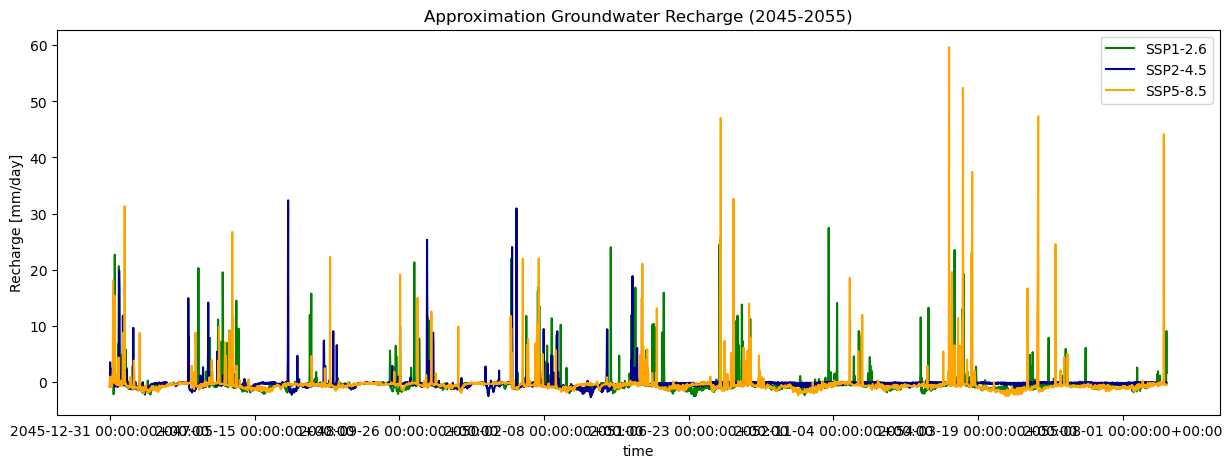

In [25]:
plt.figure(figsize=(15,5))
approx126_4555['Approximation Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
approx245_4555['Approximation Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
approx585_4555['Approximation Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
plt.title('Approximation Groundwater Recharge (2045-2055)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

### 2055-2065
The groundwater recharge from PCR-GlobWB and the approximated groundwater recharge, also with PCR-GlobWB, for the future climate scenarios from CMIP6: SSP1-2.6, SSP2-4.5 and SSP5-8.5 plotted for the ten year time period 2055-2065.

First step is loading all the CSV files in which the data is stored.

In [26]:
approx126_5565 = pd.read_csv('approx126_2055_2065.csv', index_col='time')#, parse_dates=['date_column'], index_col = 'date_column')
discharge126_5565 = pd.read_csv('discharge126_2055_2065.csv', index_col='time')
recharge126_5565 = pd.read_csv('recharge126_2055_2065.csv', index_col='time')

In [27]:
approx245_5565 = pd.read_csv('approx245_2055_2065.csv', index_col='time')
discharge245_5565 = pd.read_csv('discharge245_2055_2065.csv', index_col='time')
recharge245_5565 = pd.read_csv('recharge245_2055_2065.csv', index_col='time')

In [28]:
approx585_5565 = pd.read_csv('approx585_2055_2065.csv', index_col='time')
discharge585_5565 = pd.read_csv('discharge585_2055_2065.csv', index_col='time')
recharge585_5565 = pd.read_csv('recharge585_2055_2065.csv', index_col='time')

Now, the discharge can be converted from m3/s to mm/day. Since the other values used in the water balance are already in m/day, these only need to be converted to mm/day. Filling in the discharge in the waterbalance using only the baseflow, the approximated groundwater recharge can be plotted. This now can be compared to the groundwater recharge.


In [29]:
recharge126_5565['Groundwater Recharge'] = recharge126_5565.mean(axis=1)*1000
recharge245_5565['Groundwater Recharge'] = recharge245_5565.mean(axis=1)*1000
recharge585_5565['Groundwater Recharge'] = recharge585_5565.mean(axis=1)*1000

In [30]:
discharge126_5565['Discharge'] = discharge126_5565.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge245_5565['Discharge'] = discharge245_5565.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge585_5565['Discharge'] = discharge585_5565.mean(axis=1) * 86400 * 1000 / (388*10**6)

In [31]:
approx126_5565['Approximation Groundwater Recharge'] = approx126_5565.mean(axis=1)*1000 - discharge126_5565['Discharge'].min()
approx245_5565['Approximation Groundwater Recharge'] = approx245_5565.mean(axis=1)*1000 - discharge245_5565['Discharge'].min()
approx585_5565['Approximation Groundwater Recharge'] = approx585_5565.mean(axis=1)*1000 - discharge245_5565['Discharge'].min()

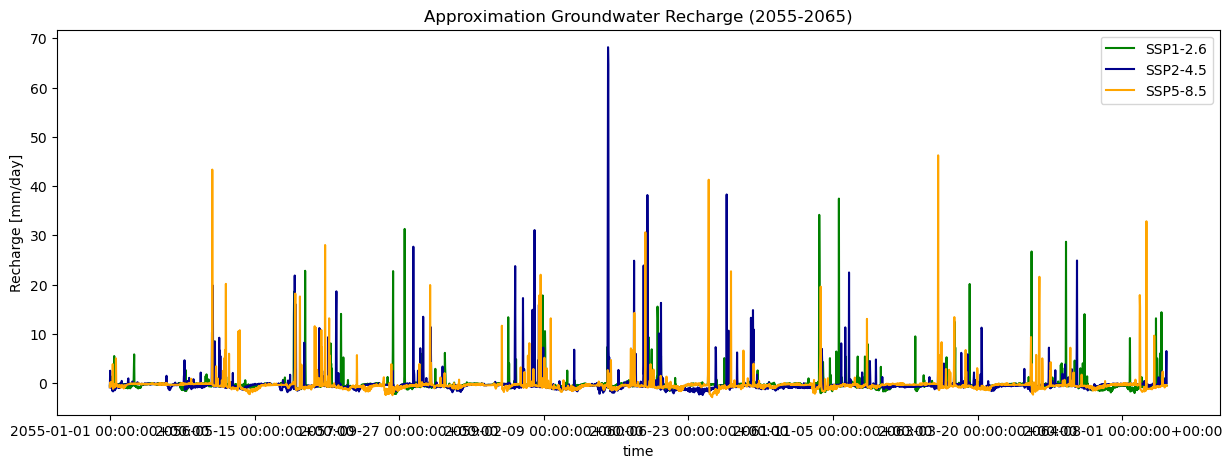

In [32]:
plt.figure(figsize=(15,5))
approx126_5565['Approximation Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
approx245_5565['Approximation Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
approx585_5565['Approximation Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
plt.title('Approximation Groundwater Recharge (2055-2065)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

### 2065-2075
The groundwater recharge from PCR-GlobWB and the approximated groundwater recharge, also with PCR-GlobWB, for the future climate scenarios from CMIP6: SSP1-2.6, SSP2-4.5 and SSP5-8.5 plotted for the ten year time period 2065-2075.

First step is loading all the CSV files in which the data is stored.

In [34]:
approx126_6575 = pd.read_csv('approx126_2065_2075.csv', index_col='time')
discharge126_6575 = pd.read_csv('discharge126_2065_2075.csv', index_col='time')
recharge126_6575 = pd.read_csv('recharge126_2065_2075.csv', index_col='time')

In [35]:
approx245_6575 = pd.read_csv('approx245_2065_2075.csv', index_col='time')
discharge245_6575 = pd.read_csv('discharge245_2065_2075.csv', index_col='time')
recharge245_6575 = pd.read_csv('recharge245_2065_2075.csv', index_col='time')

In [36]:
approx585_6575 = pd.read_csv('approx585_2065_2075.csv', index_col='time')
discharge585_6575 = pd.read_csv('discharge585_2065_2075.csv', index_col='time')
recharge585_6575 = pd.read_csv('recharge585_2065_2075.csv', index_col='time')

Now, the discharge can be converted from m3/s to mm/day. Since the other values used in the water balance are already in m/day, these only need to be converted to mm/day. Filling in the discharge in the waterbalance using only the baseflow, the approximated groundwater recharge can be plotted. This now can be compared to the groundwater recharge.


In [37]:
recharge126_6575['Groundwater Recharge'] = recharge126_6575.mean(axis=1)*1000
recharge245_6575['Groundwater Recharge'] = recharge245_6575.mean(axis=1)*1000
recharge585_6575['Groundwater Recharge'] = recharge585_6575.mean(axis=1)*1000

In [38]:
discharge126_6575['Discharge'] = discharge126_6575.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge245_6575['Discharge'] = discharge245_6575.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge585_6575['Discharge'] = discharge585_6575.mean(axis=1) * 86400 * 1000 / (388*10**6)

In [39]:
approx126_6575['Approximation Groundwater Recharge'] = approx126_6575.mean(axis=1)*1000 - discharge126_6575['Discharge'].min()
approx245_6575['Approximation Groundwater Recharge'] = approx245_6575.mean(axis=1)*1000 - discharge245_6575['Discharge'].min()
approx585_6575['Approximation Groundwater Recharge'] = approx585_6575.mean(axis=1)*1000 - discharge245_6575['Discharge'].min()

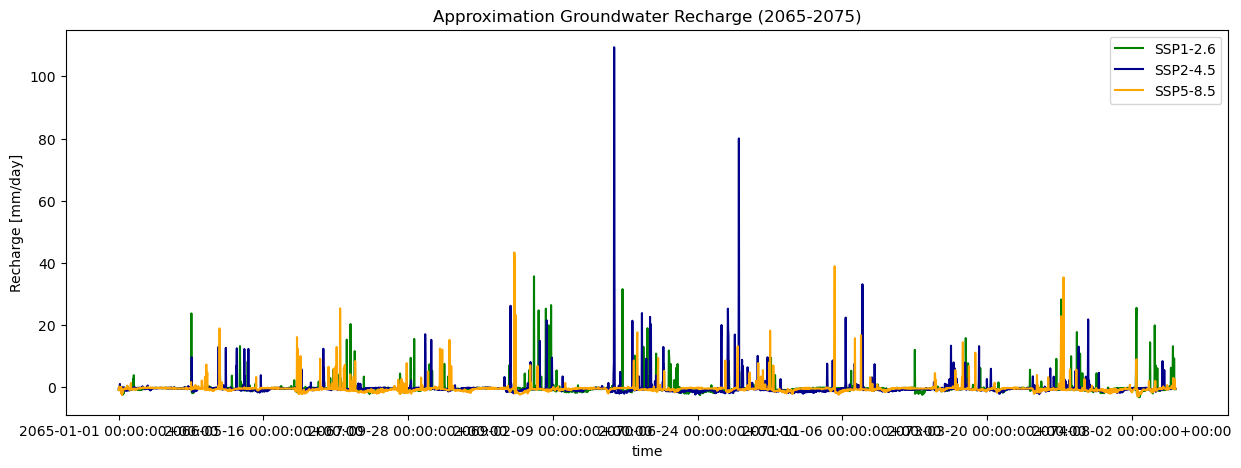

In [40]:
plt.figure(figsize=(15,5))
approx126_6575['Approximation Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
approx245_6575['Approximation Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
approx585_6575['Approximation Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
plt.title('Approximation Groundwater Recharge (2065-2075)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

In [ ]:
plt.figure(figsize=(15,5))
recharge126_6575['Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
recharge245_6575['Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
recharge585_6575['Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
plt.title('Groundwater Recharge (2065-2075)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

### 2075-2085
The groundwater recharge from PCR-GlobWB and the approximated groundwater recharge, also with PCR-GlobWB, for the future climate scenarios from CMIP6: SSP1-2.6, SSP2-4.5 and SSP5-8.5 plotted for the ten year time period 2075-2085.

First step is loading all the CSV files in which the data is stored.

In [41]:
approx126_7585 = pd.read_csv('approx126_2075_2085.csv', index_col='time')
discharge126_7585 = pd.read_csv('discharge126_2075_2085.csv', index_col='time')
recharge126_7585 = pd.read_csv('recharge126_2075_2085.csv', index_col='time')

In [42]:
approx245_7585 = pd.read_csv('approx245_2075_2085.csv', index_col='time')
discharge245_7585 = pd.read_csv('discharge245_2075_2085.csv', index_col='time')
recharge245_7585 = pd.read_csv('recharge245_2075_2085.csv', index_col='time')

In [43]:
approx585_7585 = pd.read_csv('approx585_2075_2085.csv', index_col='time')
discharge585_7585 = pd.read_csv('discharge585_2075_2085.csv', index_col='time')
recharge585_7585 = pd.read_csv('recharge585_2075_2085.csv', index_col='time')

Now, the discharge can be converted from m3/s to mm/day. Since the other values used in the water balance are already in m/day, these only need to be converted to mm/day. Filling in the discharge in the waterbalance using only the baseflow, the approximated groundwater recharge can be plotted. This now can be compared to the groundwater recharge

In [45]:
recharge126_7585['Groundwater Recharge'] = recharge126_7585.mean(axis=1)*1000
recharge245_7585['Groundwater Recharge'] = recharge245_7585.mean(axis=1)*1000
recharge585_7585['Groundwater Recharge'] = recharge585_7585.mean(axis=1)*1000

In [46]:
discharge126_7585['Discharge'] = discharge126_7585.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge245_7585['Discharge'] = discharge245_7585.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge585_7585['Discharge'] = discharge585_7585.mean(axis=1) * 86400 * 1000 / (388*10**6)

In [47]:
approx126_7585['Approximation Groundwater Recharge'] = approx126_7585.mean(axis=1)*1000 - discharge126_7585['Discharge'].min()
approx245_7585['Approximation Groundwater Recharge'] = approx245_7585.mean(axis=1)*1000 - discharge245_7585['Discharge'].min()
approx585_7585['Approximation Groundwater Recharge'] = approx585_7585.mean(axis=1)*1000 - discharge245_7585['Discharge'].min()

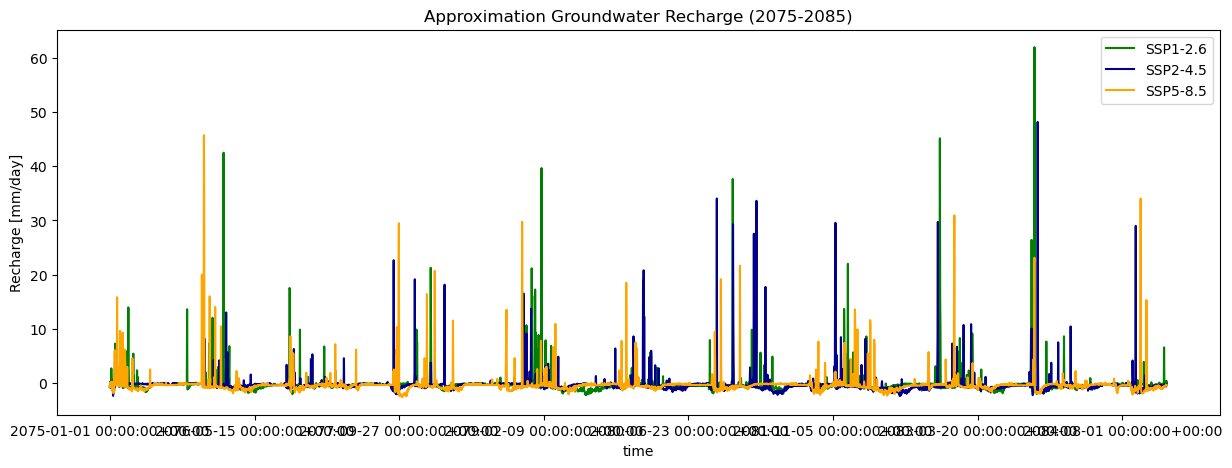

In [48]:
plt.figure(figsize=(15,5))
approx126_7585['Approximation Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
approx245_7585['Approximation Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
approx585_7585['Approximation Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
plt.title('Approximation Groundwater Recharge (2075-2085)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

### 2085-2095
The groundwater recharge from PCR-GlobWB and the approximated groundwater recharge, also with PCR-GlobWB, for the future climate scenarios from CMIP6: SSP1-2.6, SSP2-4.5 and SSP5-8.5 plotted for the ten year time period 2035-2045.

First step is loading all the CSV files in which the data is stored.

In [49]:
approx126_8595 = pd.read_csv('approx126_2085_2095.csv')
discharge126_8595 = pd.read_csv('discharge126_2085_2095.csv')
recharge126_8595 = pd.read_csv('recharge126_2085_2095.csv')

In [50]:
approx245_8595 = pd.read_csv('approx245_2085_2095.csv')
discharge245_8595 = pd.read_csv('discharge245_2085_2095.csv')
recharge245_8595 = pd.read_csv('recharge245_2085_2095.csv')

In [51]:
approx585_8595 = pd.read_csv('approx585_2085_2095.csv')
discharge585_8595 = pd.read_csv('discharge585_2085_2095.csv')
recharge585_8595 = pd.read_csv('recharge585_2085_2095.csv')

Now, the discharge can be converted from m3/s to mm/day. Since the other values used in the water balance are already in m/day, these only need to be converted to mm/day.

In [52]:
discharge126_8595['Discharge'] = discharge126_8595.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge245_8595['Discharge'] = discharge245_8595.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge585_8595['Discharge'] = discharge585_8595.mean(axis=1) * 86400 * 1000 / (388*10**6)

In [53]:
approx126_8595['Approximation Groundwater Recharge'] = approx126_8595.mean(axis=1)*1000 - discharge126_8595['Discharge'].min()
approx245_8595['Approximation Groundwater Recharge'] = approx245_8595.mean(axis=1)*1000 - discharge245_8595['Discharge'].min()
approx585_8595['Approximation Groundwater Recharge'] = approx585_8595.mean(axis=1)*1000 - discharge585_8595['Discharge'].min()

In [54]:
recharge126_7585['Groundwater Recharge'] = recharge126_7585.mean(axis=1)*1000
recharge245_7585['Groundwater Recharge'] = recharge245_7585.mean(axis=1)*1000
recharge585_7585['Groundwater Recharge'] = recharge585_7585.mean(axis=1)*1000

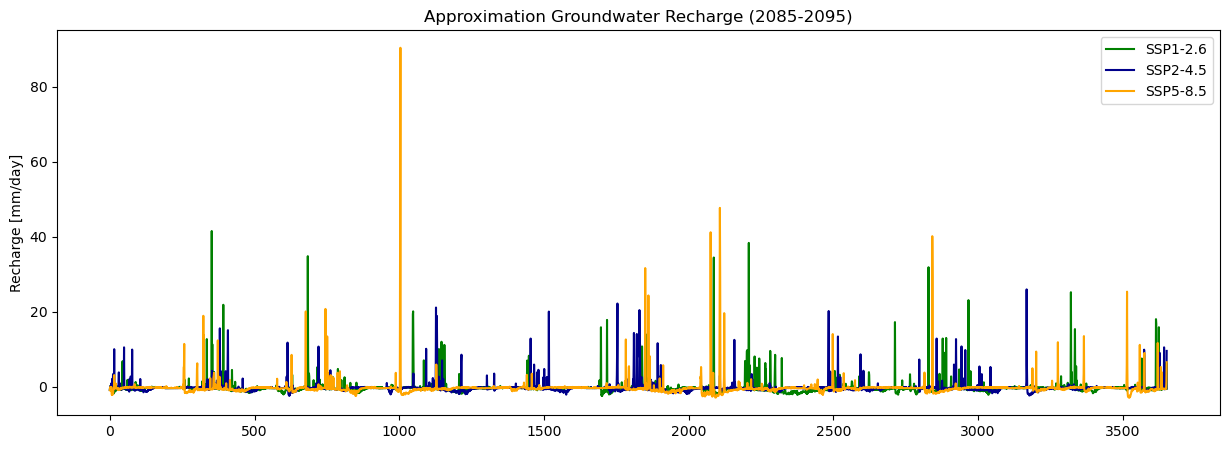

In [55]:
plt.figure(figsize=(15,5))
approx126_8595['Approximation Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
approx245_8595['Approximation Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
approx585_8595['Approximation Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
plt.title('Approximation Groundwater Recharge (2085-2095)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

### 2095-2100
The groundwater recharge from PCR-GlobWB and the approximated groundwater recharge, also with PCR-GlobWB, for the future climate scenarios from CMIP6: SSP1-2.6, SSP2-4.5 and SSP5-8.5 plotted for the ten year time period 2095-2100.

First step is loading all the CSV files in which the data is stored.

In [56]:
approx126_9500 = pd.read_csv('approx126_2095_2100.csv')
discharge126_9500 = pd.read_csv('discharge126_2095_2100.csv')
recharge126_9500 = pd.read_csv('recharge126_2095_2100.csv')

In [57]:
approx245_9500 = pd.read_csv('approx245_2095_2100.csv')
discharge245_9500 = pd.read_csv('discharge245_2095_2100.csv')
recharge245_9500 = pd.read_csv('recharge245_2095_2100.csv')

In [58]:
approx585_9500 = pd.read_csv('approx585_2095_2100.csv')
discharge585_9500 = pd.read_csv('discharge585_2095_2100.csv')
recharge585_9500 = pd.read_csv('recharge585_2095_2100.csv')

Now, the discharge can be converted from m3/s to mm/day. Since the other values used in the water balance are already in m/day, these only need to be converted to mm/day.

In [59]:
discharge126_9500['Discharge'] = discharge126_9500.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge245_9500['Discharge'] = discharge245_9500.mean(axis=1) * 86400 * 1000 / (388*10**6)
discharge585_9500['Discharge'] = discharge245_9500.mean(axis=1) * 86400 * 1000 / (388*10**6)

In [60]:
approx126_9500['Approximation Groundwater Recharge'] = approx126_9500.mean(axis=1)*1000 - discharge126_9500['Discharge'].min()
approx245_9500['Approximation Groundwater Recharge'] = approx245_9500.mean(axis=1)*1000 - discharge245_9500['Discharge'].min()
approx585_9500['Approximation Groundwater Recharge'] = approx585_9500.mean(axis=1)*1000 - discharge585_9500['Discharge'].min()

In [61]:
recharge126_9500['Groundwater Recharge'] = recharge126_9500.mean(axis=1)*1000 
recharge245_9500['Groundwater Recharge'] = recharge245_9500.mean(axis=1)*1000 
recharge585_9500['Groundwater Recharge'] = recharge585_9500.mean(axis=1)*1000 

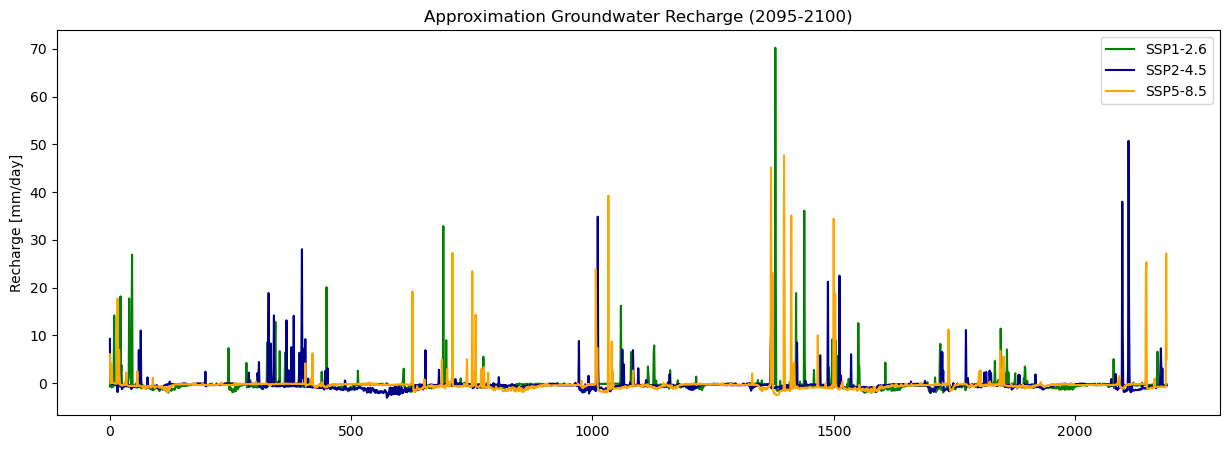

In [62]:
plt.figure(figsize=(15,5))
approx126_9500['Approximation Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
approx245_9500['Approximation Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
approx585_9500['Approximation Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
plt.title('Approximation Groundwater Recharge (2095-2100)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

In [ ]:
plt.figure(figsize=(15,5))
recharge126_9500['Groundwater Recharge'].plot(label='SSP1-2.6', color='green')
recharge245_9500['Groundwater Recharge'].plot(label='SSP2-4.5', color='darkblue')
recharge585_9500['Groundwater Recharge'].plot(label='SSP5-8.5', color='orange')
plt.title('Groundwater Recharge (2095-2100)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

### Total

Over the time period of 2025-2065.

In [63]:
approx126_2565 = pd.concat([approx126_2535['Approximation Groundwater Recharge'],
                            approx126_3545['Approximation Groundwater Recharge'],
                            approx126_4555['Approximation Groundwater Recharge'],
                            approx126_5565['Approximation Groundwater Recharge']], ignore_index=True)

approx245_2565 = pd.concat([approx245_2535['Approximation Groundwater Recharge'],
                            approx245_3545['Approximation Groundwater Recharge'],
                            approx245_4555['Approximation Groundwater Recharge'],
                            approx245_5565['Approximation Groundwater Recharge']], ignore_index=True)

approx585_2565 = pd.concat([approx585_2535['Approximation Groundwater Recharge'],
                            approx585_3545['Approximation Groundwater Recharge'],
                            approx585_4555['Approximation Groundwater Recharge'],
                            approx585_5565['Approximation Groundwater Recharge']], ignore_index=True)

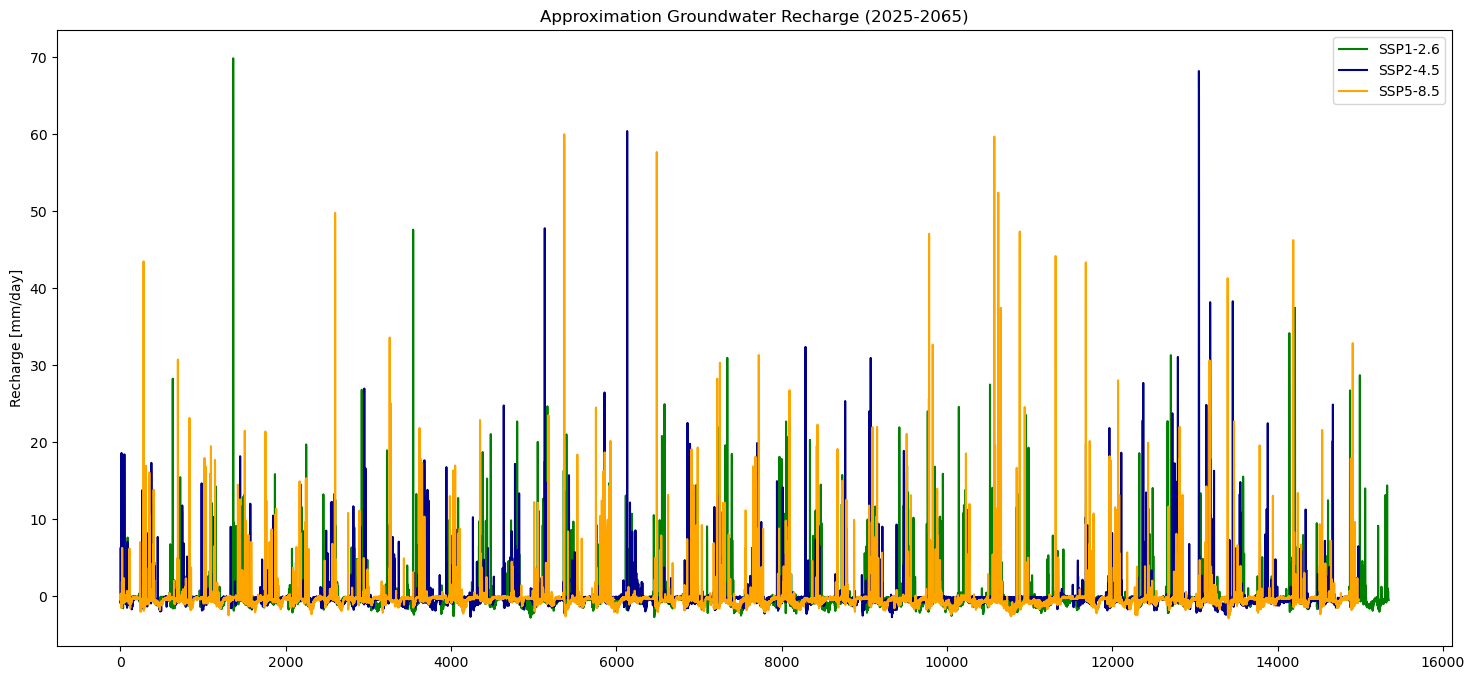

In [67]:
plt.figure(figsize=(18,8))
approx126_2565.plot(label='SSP1-2.6', color='green')
approx245_2565.plot(label='SSP2-4.5', color='darkblue')
approx585_2565.plot(label='SSP5-8.5', color='orange')
plt.title('Approximation Groundwater Recharge (2025-2065)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

Over the time period of 2065-2100.

In [70]:
approx126_6500 = pd.concat([approx126_6575['Approximation Groundwater Recharge'],
                            approx126_7585['Approximation Groundwater Recharge'],
                            approx126_8595['Approximation Groundwater Recharge'],
                            approx126_9500['Approximation Groundwater Recharge']], ignore_index=True)

approx245_6500 = pd.concat([approx245_6575['Approximation Groundwater Recharge'],
                            approx245_7585['Approximation Groundwater Recharge'],
                            approx245_8595['Approximation Groundwater Recharge'],
                            approx245_9500['Approximation Groundwater Recharge']], ignore_index=True)

approx585_6500 = pd.concat([approx585_6575['Approximation Groundwater Recharge'],
                            approx585_7585['Approximation Groundwater Recharge'],
                            approx585_8595['Approximation Groundwater Recharge'],
                            approx585_9500['Approximation Groundwater Recharge']], ignore_index=True)

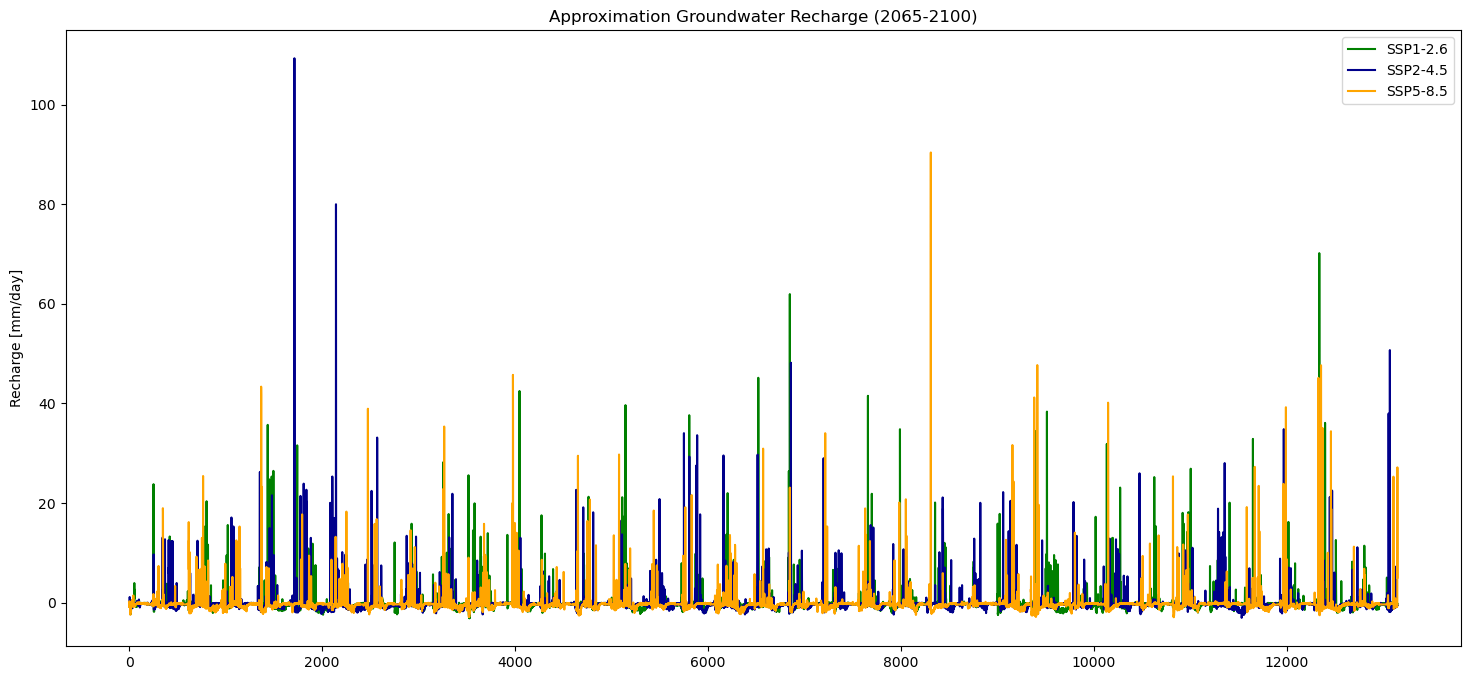

In [71]:
plt.figure(figsize=(18,8))
approx126_6500.plot(label='SSP1-2.6', color='green')
approx245_6500.plot(label='SSP2-4.5', color='darkblue')
approx585_6500.plot(label='SSP5-8.5', color='orange')
plt.title('Approximation Groundwater Recharge (2065-2100)')
plt.ylabel('Recharge [mm/day]')
plt.legend();

Boxplots with and without Z-value

In [ ]:
box = pd.DataFrame({
    'SSP1-2.6': approx126_2545,
    'SSP2-4.5': approx245_2545,
    'SSP5-8.5': approx585_2545
})
#box.boxplot()

In [ ]:
std = approx126_2545.std()
mean = approx126_2545.mean()
x = approx126_2545
z = (x - mean)/std
#print(z)
#sortedz = z.sort_values(ascending=False)

In [ ]:
box126 = pd.DataFrame(approx126_2545)
box_126 = box126[box126['Approximation Groundwater Recharge']<=4]
box245 = pd.DataFrame(approx245_2545)
box_245 = box245[box245['Approximation Groundwater Recharge']<=4]
box585 = pd.DataFrame(approx585_2545)
box_585 = box585[box585['Approximation Groundwater Recharge']<=4]

In [ ]:
box = pd.DataFrame({
    'SSP1-2.6': box_126['Approximation Groundwater Recharge'],
    'SSP2-4.5': box_245['Approximation Groundwater Recharge'],
    'SSP5-8.5': box_585['Approximation Groundwater Recharge']
})
#box.boxplot()

Over the time period 2025-2100.

In [72]:
approx126 = pd.concat([approx126_2565, approx126_6500], ignore_index=True)
approx245 = pd.concat([approx245_2565, approx245_6500], ignore_index=True)
approx585 = pd.concat([approx585_2565, approx585_6500], ignore_index=True)

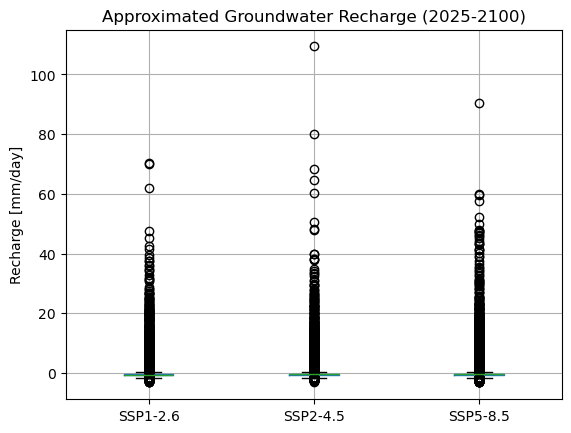

In [73]:
box = pd.DataFrame({
    'SSP1-2.6': approx126,
    'SSP2-4.5': approx245,
    'SSP5-8.5': approx585
})
box.boxplot()
plt.title('Approximated Groundwater Recharge (2025-2100)')
plt.ylabel('Recharge [mm/day]');

In [74]:
box126 = pd.DataFrame(approx126)
box_126 = box126[box126['Approximation Groundwater Recharge']<=4]
box245 = pd.DataFrame(approx245)
box_245 = box245[box245['Approximation Groundwater Recharge']<=4]
box585 = pd.DataFrame(approx585)
box_585 = box585[box585['Approximation Groundwater Recharge']<=4]

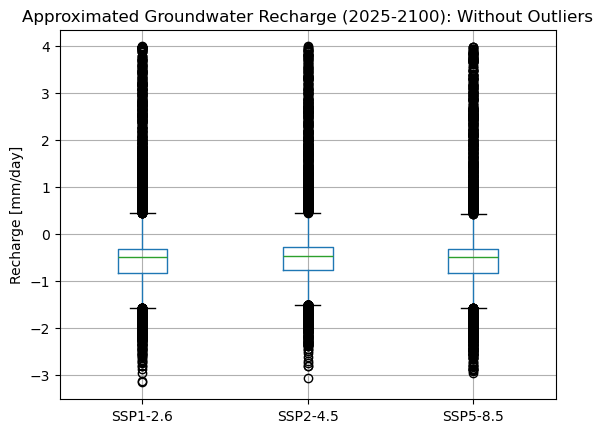

In [75]:
box = pd.DataFrame({
    'SSP1-2.6': box_126['Approximation Groundwater Recharge'],
    'SSP2-4.5': box_245['Approximation Groundwater Recharge'],
    'SSP5-8.5': box_585['Approximation Groundwater Recharge']
})
box.boxplot()
plt.title('Approximated Groundwater Recharge (2025-2100): Without Outliers')
plt.ylabel('Recharge [mm/day]');

[-2.87379016949634, -6.23249346428005, -5.5819919999322805]

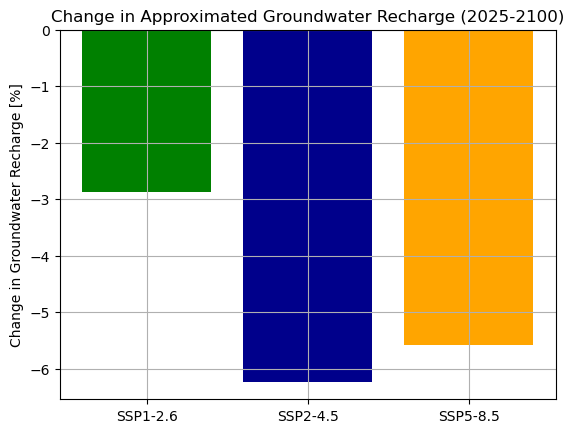

In [76]:
baseline = -123.0466164656514
tot126 = approx126.sum()/75
tot245 = approx245.sum()/75
tot585 = approx585.sum()/75
tot = [tot126, tot245, tot585]
per = []
for i in range(len(tot)):
    per.append((((tot[i])-(baseline))/baseline)*100)
print(per)

categories = ["SSP1-2.6", "SSP2-4.5", "SSP5-8.5"]
totals = [per[0], per[1], per[2]]
colors = ["green", "darkblue", "orange"]

for i in range(len(totals)):
    plt.bar(categories[i], totals[i], color=colors[i])

plt.title("Change in Approximated Groundwater Recharge (2025-2100)")
plt.ylabel("Change in Groundwater Recharge [%]")
plt.grid();

In time periods of 20 years: 2025-2045, 2045-2065, 2065-2085, 2085-2100.

In [77]:
baseline = -123.0466164656514

In [78]:
approx126_2545 = pd.concat([approx126_2535['Approximation Groundwater Recharge'],
                            approx126_3545['Approximation Groundwater Recharge']], ignore_index=True)

approx245_2545 = pd.concat([approx245_2535['Approximation Groundwater Recharge'],
                            approx245_3545['Approximation Groundwater Recharge']], ignore_index=True)

approx585_2545 = pd.concat([approx585_2535['Approximation Groundwater Recharge'],
                            approx585_3545['Approximation Groundwater Recharge']], ignore_index=True)

In [79]:
tot126_2545 = approx126_2545.sum()/20
tot245_2545 = approx245_2545.sum()/20
tot585_2545 = approx585_2545.sum()/20
tot2545 = [tot126_2545, tot245_2545, tot585_2545]
per2545 = []
for i in range(len(tot2545)):
    per2545.append((((tot2545[i])-(baseline))/baseline)*100)
print(per2545)

[9.410151440661336, -5.085603126764805, -13.216148023149877]

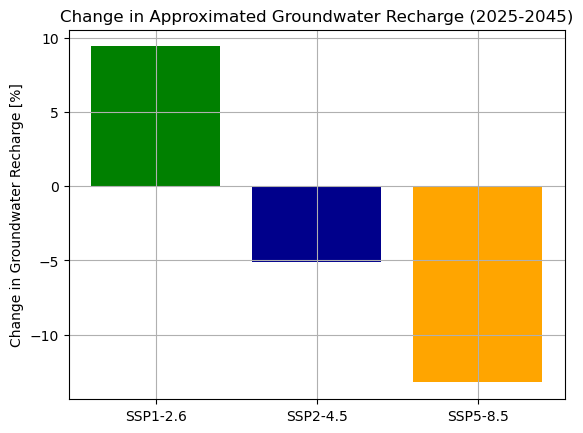

In [80]:
categories = ["SSP1-2.6", "SSP2-4.5", "SSP5-8.5"]
totals = [per2545[0], per2545[1], per2545[2]]
colors = ["green", "darkblue", "orange"]

for i in range(len(totals)):
    plt.bar(categories[i], totals[i], color=colors[i])

plt.title("Change in Approximated Groundwater Recharge (2025-2045)")
plt.ylabel("Change in Groundwater Recharge [%]")
plt.grid();

In [81]:
approx126_4565 = pd.concat([approx126_4555['Approximation Groundwater Recharge'],
                            approx126_5565['Approximation Groundwater Recharge']], ignore_index=True)

approx245_4565 = pd.concat([approx245_4555['Approximation Groundwater Recharge'],
                            approx245_5565['Approximation Groundwater Recharge']], ignore_index=True)

approx585_4565 = pd.concat([approx585_4555['Approximation Groundwater Recharge'],
                            approx585_5565['Approximation Groundwater Recharge']], ignore_index=True)

[-1.8872706928698677, -12.73849827396821, 0.7228541011996633]

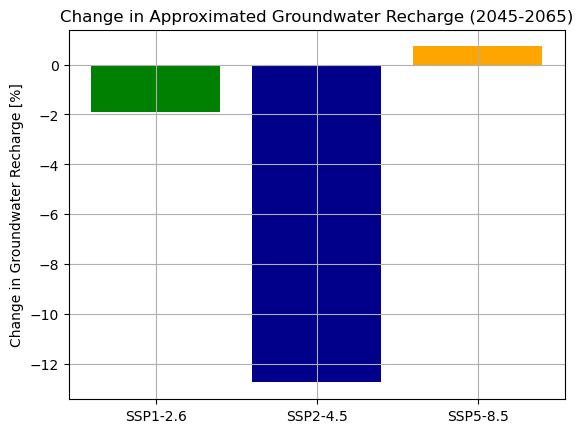

In [82]:
tot126_4565 = approx126_4565.sum()/20
tot245_4565 = approx245_4565.sum()/20
tot585_4565 = approx585_4565.sum()/20
tot4565 = [tot126_4565, tot245_4565, tot585_4565]
per4565 = []
for i in range(len(tot4565)):
    per4565.append((((tot4565[i])-(baseline))/baseline)*100)
print(per4565)

categories = ["SSP1-2.6", "SSP2-4.5", "SSP5-8.5"]
totals = [per4565[0], per4565[1], per4565[2]]
colors = ["green", "darkblue", "orange"]

for i in range(len(totals)):
    plt.bar(categories[i], totals[i], color=colors[i])

plt.title("Change in Approximated Groundwater Recharge (2045-2065)")
plt.ylabel("Change in Groundwater Recharge [%]")
plt.grid();

In [83]:
approx126_6585 = pd.concat([approx126_6575['Approximation Groundwater Recharge'],
                            approx126_7585['Approximation Groundwater Recharge']], ignore_index=True)

approx245_6585 = pd.concat([approx245_6575['Approximation Groundwater Recharge'],
                            approx245_7585['Approximation Groundwater Recharge']], ignore_index=True)

approx585_6585 = pd.concat([approx585_6575['Approximation Groundwater Recharge'],
                            approx585_7585['Approximation Groundwater Recharge']], ignore_index=True)

[-13.658661731231291, -7.353279872919866, -1.330751160786694]

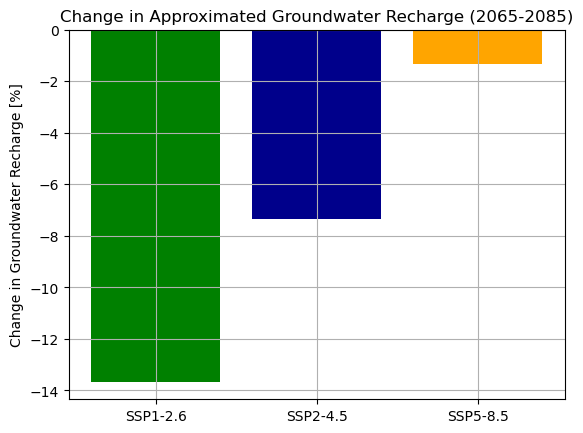

In [84]:
tot126_6585 = approx126_6585.sum()/20
tot245_6585 = approx245_6585.sum()/20
tot585_6585 = approx585_6585.sum()/20
tot6585 = [tot126_6585, tot245_6585, tot585_6585]
per6585 = []
for i in range(len(tot6585)):
    per6585.append((((tot6585[i])-(baseline))/baseline)*100)
print(per6585)

categories = ["SSP1-2.6", "SSP2-4.5", "SSP5-8.5"]
totals = [per6585[0], per6585[1], per6585[2]]
colors = ["green", "darkblue", "orange"]

for i in range(len(totals)):
    plt.bar(categories[i], totals[i], color=colors[i])

plt.title("Change in Approximated Groundwater Recharge (2065-2085)")
plt.ylabel("Change in Groundwater Recharge [%]")
plt.grid();

In [85]:
approx126_8500 = pd.concat([approx126_8595['Approximation Groundwater Recharge'],
                            approx126_9500['Approximation Groundwater Recharge']], ignore_index=True)

approx245_8500 = pd.concat([approx245_8595['Approximation Groundwater Recharge'],
                            approx245_9500['Approximation Groundwater Recharge']], ignore_index=True)

approx585_8500 = pd.concat([approx585_8595['Approximation Groundwater Recharge'],
                            approx585_9500['Approximation Groundwater Recharge']], ignore_index=True)

[-29.640932152171533, -23.19446921739733, -32.108424917009096]

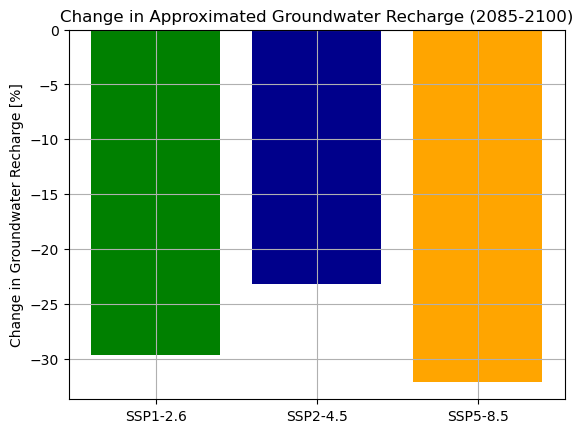

In [90]:
tot126_8500 = approx126_8500.sum()/20
tot245_8500 = approx245_8500.sum()/20
tot585_8500 = approx585_8500.sum()/20
tot8500 = [tot126_8500, tot245_8500, tot585_8500]
per8500 = []
for i in range(len(tot8500)):
    per8500.append((((tot8500[i])-(baseline))/baseline)*100)
print(per8500)

categories = ["SSP1-2.6", "SSP2-4.5", "SSP5-8.5"]
totals = [per8500[0], per8500[1], per8500[2]]
colors = ["green", "darkblue", "orange"]

for i in range(len(totals)):
    plt.bar(categories[i], totals[i], color=colors[i])

plt.title("Change in Approximated Groundwater Recharge (2085-2100)")
plt.ylabel("Change in Groundwater Recharge [%]")
plt.grid();

### Total recharge

In [93]:
recharge126_6500 = pd.concat([recharge126_2535['Groundwater Recharge'],
                            recharge126_3545['Groundwater Recharge'],
                            recharge126_4555['Groundwater Recharge'],
                            recharge126_5565['Groundwater Recharge']], ignore_index=True)

recharge245_6500 = pd.concat([recharge245_2535['Groundwater Recharge'],
                            recharge245_3545['Groundwater Recharge'],
                            recharge245_4555['Groundwater Recharge'],
                            recharge245_5565['Groundwater Recharge']], ignore_index=True)

recharge585_6500 = pd.concat([recharge585_2535['Groundwater Recharge'],
                            recharge585_3545['Groundwater Recharge'],
                            recharge585_4555['Groundwater Recharge'],
                            recharge585_5565['Groundwater Recharge']], ignore_index=True)

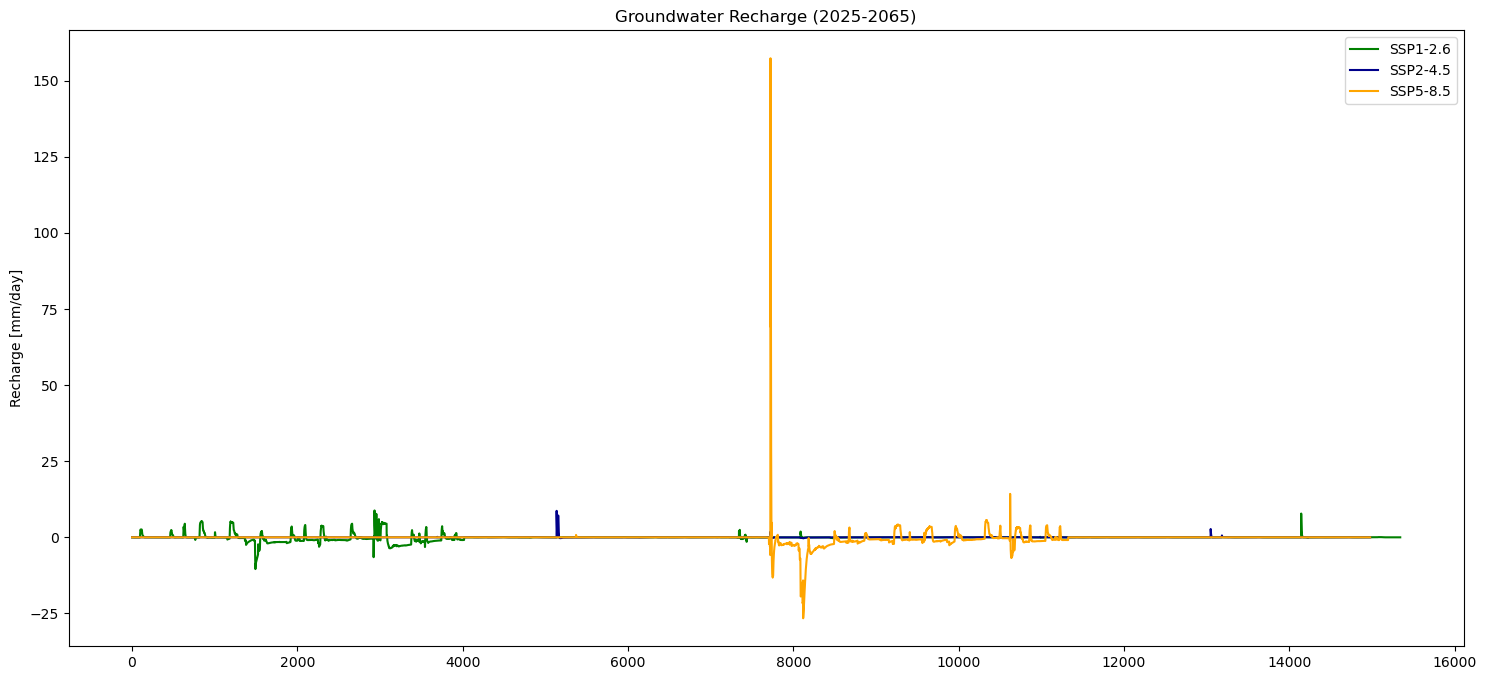

In [95]:
plt.figure(figsize=(18,8))
recharge126_6500.plot(label='SSP1-2.6', color='green')
recharge245_6500.plot(label='SSP2-4.5', color='darkblue')
recharge585_6500.plot(label='SSP5-8.5', color='orange')
plt.title('Groundwater Recharge (2025-2065)')
plt.ylabel('Recharge [mm/day]')
plt.legend();